<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#等号(equals)の意味" data-toc-modified-id="等号(equals)の意味-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>等号(equals)の意味</a></span><ul class="toc-item"><li><span><a href="#変数への代入=-(equal)" data-toc-modified-id="変数への代入=-(equal)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>変数への代入= (equal)</a></span></li><li><span><a href="#方程式の解(solve)" data-toc-modified-id="方程式の解(solve)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>方程式の解(solve)</a></span></li><li><span><a href="#恒等式" data-toc-modified-id="恒等式-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>恒等式</a></span></li></ul></li><li><span><a href="#課題" data-toc-modified-id="課題-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>課題</a></span><ul class="toc-item"><li><span><a href="#3点を通る2次方程式" data-toc-modified-id="3点を通る2次方程式-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3点を通る2次方程式</a></span></li><li><span><a href="#関数と点の同時plot" data-toc-modified-id="関数と点の同時plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>関数と点の同時plot</a></span></li></ul></li></ul></div>

<div style="text-align: center;">
   <font size="5"> 等号 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2017-10-31 </font>
</div>

* file: ~/python/doing_math_with_python/equals.ipynb

# 等号(equals)の意味

等号は，数学でいろいろな意味を持つことを中学校で学びます．
それぞれの状況による意味の違いを人間は適当に判断していますが，
プログラムであるpythonでは無理です．
pythonでは，それぞれ違った記号や操作として用意され，
人間がpythonに明示的に指示する必要がある．

## 変数への代入= (equal)
変数に値を代入する時には= (equal)を使います．例えば，

In [1]:
a=3
b=2

In [2]:
print(a+b)

5


代数演算に変数名のまま使うには，Symbolあるいはsymbolsでpythonに教えてやる必要があります．

In [3]:
from sympy import *
a,b,c,x = symbols('a,b,c,x')

eq1 = a*x**2 + b*x + c

In [4]:
pprint(eq1)

   2          
a⋅x  + b⋅x + c


値の代入はsubsで定義辞書を渡すことになります．

In [5]:
pprint(eq1.subs({x:3}))

9⋅a + 3⋅b + c


In [6]:
pprint(eq1.subs({a:2}))

             2
b⋅x + c + 2⋅x 


まちがって代入すると，それ以降のsubsが効かなくなるので，注意してください．

In [7]:
a=3
pprint(eq1)
pprint(eq1.subs({a:2}))

   2          
a⋅x  + b⋅x + c
   2          
a⋅x  + b⋅x + c


その場合は，symbolsなどで元に戻す必要があります．

In [8]:
a = symbols('a')

In [9]:
pprint(eq1.subs({a:2}))

             2
b⋅x + c + 2⋅x 


## 方程式の解(solve)

> 3x=2を満たすxを求めよ

は片方の辺へ移項して，解きます．

In [10]:
eq1 = 3*x - 2
pprint(eq1)

3⋅x - 2


In [11]:
solve(eq1)

[2/3]

2次方程式も同じようして解けます．

In [12]:
eq1 = a*x**2 + b*x + c
pprint(eq1)

   2          
a⋅x  + b⋅x + c


In [13]:
solve(eq1)

[{a: -(b*x + c)/x**2}]

おやおや，おかしいですね．とくべき未知数(x)を指定するのを忘れています．

In [14]:
solve(eq1,x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

出力としてpythonの辞書形式で戻す場合には，dict=Trueが必要になります．

In [15]:
solve(eq1,x, dict=True)

[{x: (-b + sqrt(-4*a*c + b**2))/(2*a)}, {x: -(b + sqrt(-4*a*c + b**2))/(2*a)}]

連立方程式も同じようにして解けます．

In [16]:
y = symbols('y')
solve({x+y-1,x-y-2},{x,y})

{x: 3/2, y: -1/2}

解析的に解けないときは，数値解を求める必要があります．これはpythonによる数値計算で詳述します．簡単なコマンドはなさそうです．

In [17]:
solve(log(x)-exp(-x),x)

NotImplementedError: multiple generators [exp(x), log(x)]
No algorithms are implemented to solve equation log(x) - exp(-x)

両辺ともに長い式の時には，右辺(rhs),左辺(lhs)なんかを使ってまとめたりします．

In [18]:
rhs = sin(x)**2 + 3*cos(x)
lhs = 2*cos(x)**2 + cos(2*x)
eq1 = rhs -lhs
pprint(eq1)
solve(eq1,x)

   2           2                         
sin (x) - 2⋅cos (x) + 3⋅cos(x) - cos(2⋅x)


[0, -I*log(-2/5 - sqrt(21)*I/5), -I*log(-2/5 + sqrt(21)*I/5)]

## 恒等式
式の変形にも等号が使われます．例えば，
$$
(x-2)^2 = x^2 -4x +4
$$
なんかです．これは左辺と右辺がどんな$x$に対しても
成り立っていること，恒等式であることを表現しています．

このような式の変形においても，問題としては
> $(x-2)^2$を展開(expand)せよ

となります．ですので，

In [19]:
from sympy import *

x = Symbol('x')
eq1 = (x-2)**2

In [20]:
pprint(eq1)
pprint(eq1.expand())

       2
(x - 2) 
 2          
x  - 4⋅x + 4


となります．因数分解，微積分なども同様にそれぞれのコマンドが用意されています．これは別の章で詳しく解説します．

# 課題

## 3点を通る2次方程式

3点(1,2),(-3,4),(-1,1)を通る２次方程式を求めよ．

In [21]:
from sympy import *
a,b,c,x = symbols('a,b,c,x')
f = a*x**2 + b*x + c

In [22]:
eq1 = f.subs({x:1})-2

In [23]:
eq2 = f.subs({x:-3})-4
eq3 = f.subs({x:-1})-1

In [24]:
s1 = solve({eq1,eq2,eq3},{a,b,c})
print(s1)

{a: 1/2, b: 1/2, c: 1}


In [25]:
f1 = f.subs(s1)
print(f1)

x**2/2 + x/2 + 1


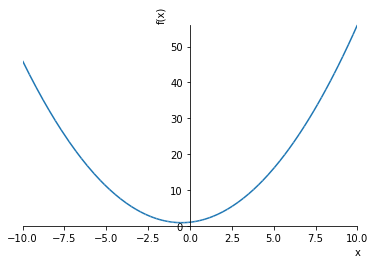

In [26]:
from sympy.plotting import plot

plot(f1)

## 関数と点の同時plot

得られた関数と与えられた点を同時にplotするのに苦労した．
func内で上で得られたf1を使いたかったが，だめ．
symbolと値の取り扱いが混ざってしまうのかな．

とりあえず，関数をベタ打ちすると以下のとおり表示OK.


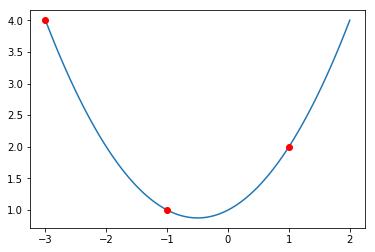

In [27]:
#from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**2/2 + x/2 + 1

xx = np.linspace(-3,2, 100)
plt.plot(xx, func(xx))
px=[1,-3,-1]
py=[2,4,1]
plt.plot(px,py,'o', color='r')
plt.show()